In [2]:
import os
import h5py
import json
import math
import keras
import random 
import imageio
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras import backend as K
import matplotlib.pyplot as plt

In [3]:
#=================================================================================================================
#                                              Data Loading 
#=================================================================================================================

Train_Data = pd.read_csv('Hotel-A-train.csv')
Val_Data = pd.read_csv('Hotel-A-validation.csv') 
Test_Data = pd.read_csv('Hotel-A-test.csv') 

Train_Data.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [4]:
Train_Data.describe()

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate
count,2.749900e+04,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000
mean,5.016461e+07,43.977454,2.333576,1.743882,0.351540,12.495182,175.136478
std,2.886911e+07,15.303148,1.176526,0.721972,0.573326,11.206036,43.877087
min,3.154000e+03,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000
25%,2.523943e+07,31.000000,2.000000,1.000000,0.000000,5.000000,137.000000
50%,5.014996e+07,44.000000,2.000000,2.000000,0.000000,10.000000,175.000000
75%,7.518288e+07,57.000000,3.000000,2.000000,1.000000,20.000000,214.000000
max,9.999900e+07,70.000000,5.000000,3.000000,2.000000,40.000000,250.000000


In [5]:
#=================================================================================================================
#                                              Check for null Values
#=================================================================================================================
Train_Data.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [6]:
#=================================================================================================================
#            Check for Unique Values & changes of unique values in Training, Testing and Validation
#=================================================================================================================
for i in Train_Data.columns:
    if i not in ["Booking_date","Expected_checkin","Expected_checkout",'Reservation_Status']: 
        print(i," =>",(Train_Data[i].unique()).sort()==(Val_Data[i].unique()).sort(),(Train_Data[i].unique()).sort()==
              (Test_Data[i].unique()).sort(),"\n",Train_Data[i].unique(),"\n")

Reservation-id  => True True 
 [39428300 77491756 73747291 ... 52023375 98041387 55243988] 

Gender  => True True 
 ['F' 'M'] 

Age  => True True 
 [40 49 42 25 62 34 53 59 21 69 52 55 22 32 45 33 43 38 18 66 44 29 54 48
 23 35 36 51 68 28 67 63 60 26 24 56 61 65 46 64 58 31 37 47 39 57 30 19
 41 20 27 70 50] 

Ethnicity  => True True 
 ['Latino' 'caucasian' 'African American' 'Asian American'] 

Educational_Level  => True True 
 ['Grad' 'Mid-School' 'College' 'High-School'] 

Income  => True True 
 ['<25K' '50K -- 100K' '>100K' '25K --50K'] 

Country_region  => True True 
 ['North' 'East' 'South' 'West'] 

Hotel_Type  => True True 
 ['City Hotel' 'Airport Hotels' 'Resort'] 

Adults  => True True 
 [2 3 4 1 5] 

Children  => True True 
 [2 3 1] 

Babies  => True True 
 [0 1 2] 

Meal_Type  => True True 
 ['BB' 'FB' 'HB'] 

Visted_Previously  => True True 
 ['No' 'Yes'] 

Previous_Cancellations  => True True 
 ['No' 'Yes'] 

Deposit_type  => True True 
 ['No Deposit' 'Refundable' 'Non-R

In [7]:
#=================================================================================================================
#                                             Data Types
#=================================================================================================================

Train_Data["Expected_checkin"]=pd.to_datetime(Train_Data["Expected_checkin"])
Val_Data["Expected_checkin"]=pd.to_datetime(Val_Data["Expected_checkin"])
Test_Data["Expected_checkin"]=pd.to_datetime(Test_Data["Expected_checkin"])

Train_Data["Expected_checkout"]=pd.to_datetime(Train_Data["Expected_checkout"])
Val_Data["Expected_checkout"]=pd.to_datetime(Val_Data["Expected_checkout"])
Test_Data["Expected_checkout"]=pd.to_datetime(Test_Data["Expected_checkout"])

Train_Data["Booking_date"]=pd.to_datetime(Train_Data["Booking_date"])
Val_Data["Booking_date"]=pd.to_datetime(Val_Data["Booking_date"])
Test_Data["Booking_date"]=pd.to_datetime(Test_Data["Booking_date"])

print(Train_Data.dtypes)

Reservation-id                     int64
Gender                            object
Age                                int64
Ethnicity                         object
Educational_Level                 object
Income                            object
Country_region                    object
Hotel_Type                        object
Expected_checkin          datetime64[ns]
Expected_checkout         datetime64[ns]
Booking_date              datetime64[ns]
Adults                             int64
Children                           int64
Babies                             int64
Meal_Type                         object
Visted_Previously                 object
Previous_Cancellations            object
Deposit_type                      object
Booking_channel                   object
Required_Car_Parking              object
Reservation_Status                object
Use_Promotion                     object
Discount_Rate                      int64
Room_Rate                          int64
dtype: object


In [8]:
#=================================================================================================================
#                                             Manual Feature encoding 
#=================================================================================================================
Train_Data["Gender"]=Train_Data["Gender"].replace("F", 0)
Val_Data["Gender"]=Val_Data["Gender"].replace("F", 0)
Test_Data["Gender"]=Test_Data["Gender"].replace("F", 0)
Train_Data["Gender"]=Train_Data["Gender"].replace("M", 1)
Val_Data["Gender"]=Val_Data["Gender"].replace("M", 1)
Test_Data["Gender"]=Test_Data["Gender"].replace("M", 1)
Train_Data["Gender"]=pd.to_numeric(Train_Data["Gender"])
Val_Data["Gender"]=pd.to_numeric(Val_Data["Gender"])
Test_Data["Gender"]=pd.to_numeric(Test_Data["Gender"])

Train_Data["Visted_Previously"]=Train_Data["Visted_Previously"].replace("No", 0)
Val_Data["Visted_Previously"]=Val_Data["Visted_Previously"].replace("No", 0)
Test_Data["Visted_Previously"]=Test_Data["Visted_Previously"].replace("No", 0)
Train_Data["Visted_Previously"]=Train_Data["Visted_Previously"].replace("Yes", 1)
Val_Data["Visted_Previously"]=Val_Data["Visted_Previously"].replace("Yes", 1)
Test_Data["Visted_Previously"]=Test_Data["Visted_Previously"].replace("Yes", 1)
Train_Data["Visted_Previously"]=pd.to_numeric(Train_Data["Visted_Previously"])
Val_Data["Visted_Previously"]=pd.to_numeric(Val_Data["Visted_Previously"])
Test_Data["Visted_Previously"]=pd.to_numeric(Test_Data["Visted_Previously"])

Train_Data["Previous_Cancellations"]=Train_Data["Previous_Cancellations"].replace("No", 0)
Val_Data["Previous_Cancellations"]=Val_Data["Previous_Cancellations"].replace("No", 0)
Test_Data["Previous_Cancellations"]=Test_Data["Previous_Cancellations"].replace("No", 0)
Train_Data["Previous_Cancellations"]=Train_Data["Previous_Cancellations"].replace("Yes", 1)
Val_Data["Previous_Cancellations"]=Val_Data["Previous_Cancellations"].replace("Yes", 1)
Test_Data["Previous_Cancellations"]=Test_Data["Previous_Cancellations"].replace("Yes", 1)
Train_Data["Previous_Cancellations"]=pd.to_numeric(Train_Data["Previous_Cancellations"])
Val_Data["Previous_Cancellations"]=pd.to_numeric(Val_Data["Previous_Cancellations"])
Test_Data["Previous_Cancellations"]=pd.to_numeric(Test_Data["Previous_Cancellations"])

Train_Data["Required_Car_Parking"]=Train_Data["Required_Car_Parking"].replace("No", 0)
Val_Data["Required_Car_Parking"]=Val_Data["Required_Car_Parking"].replace("No", 0)
Test_Data["Required_Car_Parking"]=Test_Data["Required_Car_Parking"].replace("No", 0)
Train_Data["Required_Car_Parking"]=Train_Data["Required_Car_Parking"].replace("Yes", 1)
Val_Data["Required_Car_Parking"]=Val_Data["Required_Car_Parking"].replace("Yes", 1)
Test_Data["Required_Car_Parking"]=Test_Data["Required_Car_Parking"].replace("Yes", 1)
Train_Data["Required_Car_Parking"]=pd.to_numeric(Train_Data["Required_Car_Parking"])
Val_Data["Required_Car_Parking"]=pd.to_numeric(Val_Data["Required_Car_Parking"])
Test_Data["Required_Car_Parking"]=pd.to_numeric(Test_Data["Required_Car_Parking"])

Train_Data["Use_Promotion"]=Train_Data["Use_Promotion"].replace("No", 0)
Val_Data["Use_Promotion"]=Val_Data["Use_Promotion"].replace("No", 0)
Test_Data["Use_Promotion"]=Test_Data["Use_Promotion"].replace("No", 0)
Train_Data["Use_Promotion"]=Train_Data["Use_Promotion"].replace("Yes", 1)
Val_Data["Use_Promotion"]=Val_Data["Use_Promotion"].replace("Yes", 1)
Test_Data["Use_Promotion"]=Test_Data["Use_Promotion"].replace("Yes", 1)
Train_Data["Use_Promotion"]=pd.to_numeric(Train_Data["Use_Promotion"])
Val_Data["Use_Promotion"]=pd.to_numeric(Val_Data["Use_Promotion"])
Test_Data["Use_Promotion"]=pd.to_numeric(Test_Data["Use_Promotion"])

Train_Data["Educational_Level"]=Train_Data["Educational_Level"].replace("Mid-School", 0)
Val_Data["Educational_Level"]=Val_Data["Educational_Level"].replace("Mid-School", 0)
Test_Data["Educational_Level"]=Test_Data["Educational_Level"].replace("Mid-School", 0)
Train_Data["Educational_Level"]=Train_Data["Educational_Level"].replace("High-School", 1)
Val_Data["Educational_Level"]=Val_Data["Educational_Level"].replace("High-School", 1)
Test_Data["Educational_Level"]=Test_Data["Educational_Level"].replace("High-School", 1)
Train_Data["Educational_Level"]=Train_Data["Educational_Level"].replace("College", 2)
Val_Data["Educational_Level"]=Val_Data["Educational_Level"].replace("College", 2)
Test_Data["Educational_Level"]=Test_Data["Educational_Level"].replace("College", 2)
Train_Data["Educational_Level"]=Train_Data["Educational_Level"].replace("Grad", 3)
Val_Data["Educational_Level"]=Val_Data["Educational_Level"].replace("Grad", 3)
Test_Data["Educational_Level"]=Test_Data["Educational_Level"].replace("Grad", 3)
Train_Data["Educational_Level"]=pd.to_numeric(Train_Data["Educational_Level"])
Val_Data["Educational_Level"]=pd.to_numeric(Val_Data["Educational_Level"])
Test_Data["Educational_Level"]=pd.to_numeric(Test_Data["Educational_Level"])

Train_Data["Income"]=Train_Data["Income"].replace('<25K', 0)
Val_Data["Income"]=Val_Data["Income"].replace("<25K", 0)
Test_Data["Income"]=Test_Data["Income"].replace("<25K", 0)
Train_Data["Income"]=Train_Data["Income"].replace("25K --50K", 1)
Val_Data["Income"]=Val_Data["Income"].replace("25K --50K", 1)
Test_Data["Income"]=Test_Data["Income"].replace("25K --50K", 1)
Train_Data["Income"]=Train_Data["Income"].replace("50K -- 100K", 2)
Val_Data["Income"]=Val_Data["Income"].replace("50K -- 100K", 2)
Test_Data["Income"]=Test_Data["Income"].replace("50K -- 100K", 2)
Train_Data["Income"]=Train_Data["Income"].replace(">100K", 3)
Val_Data["Income"]=Val_Data["Income"].replace(">100K", 3)
Test_Data["Income"]=Test_Data["Income"].replace(">100K", 3)
Train_Data["Income"]=pd.to_numeric(Train_Data["Income"])
Val_Data["Income"]=pd.to_numeric(Val_Data["Income"])
Test_Data["Income"]=pd.to_numeric(Test_Data["Income"])

Train_Data["Meal_Type"]=Train_Data["Meal_Type"].replace('BB', 0)
Val_Data["Meal_Type"]=Val_Data["Meal_Type"].replace("BB", 0)
Test_Data["Meal_Type"]=Test_Data["Meal_Type"].replace("BB", 0)
Train_Data["Meal_Type"]=Train_Data["Meal_Type"].replace("HB", 1)
Val_Data["Meal_Type"]=Val_Data["Meal_Type"].replace("HB", 1)
Test_Data["Meal_Type"]=Test_Data["Meal_Type"].replace("HB", 1)
Train_Data["Meal_Type"]=Train_Data["Meal_Type"].replace("FB", 2)
Val_Data["Meal_Type"]=Val_Data["Meal_Type"].replace("FB", 2)
Test_Data["Meal_Type"]=Test_Data["Meal_Type"].replace("FB", 2)
Train_Data["Meal_Type"]=pd.to_numeric(Train_Data["Meal_Type"])
Val_Data["Meal_Type"]=pd.to_numeric(Val_Data["Meal_Type"])
Test_Data["Meal_Type"]=pd.to_numeric(Test_Data["Meal_Type"])

Train_Data["Deposit_type"]=Train_Data["Deposit_type"].replace('No Deposit', 0)
Val_Data["Deposit_type"]=Val_Data["Deposit_type"].replace("No Deposit", 0)
Test_Data["Deposit_type"]=Test_Data["Deposit_type"].replace("No Deposit", 0)
Train_Data["Deposit_type"]=Train_Data["Deposit_type"].replace("Refundable", 1)
Val_Data["Deposit_type"]=Val_Data["Deposit_type"].replace("Refundable", 1)
Test_Data["Deposit_type"]=Test_Data["Deposit_type"].replace("Refundable", 1)
Train_Data["Deposit_type"]=Train_Data["Deposit_type"].replace("Non-Refundable", 2)
Val_Data["Deposit_type"]=Val_Data["Deposit_type"].replace("Non-Refundable", 2)
Test_Data["Deposit_type"]=Test_Data["Deposit_type"].replace("Non-Refundable", 2)
Train_Data["Deposit_type"]=pd.to_numeric(Train_Data["Deposit_type"])
Val_Data["Deposit_type"]=pd.to_numeric(Val_Data["Deposit_type"])
Test_Data["Deposit_type"]=pd.to_numeric(Test_Data["Deposit_type"])

Train_Data["Reservation_Status"]=Train_Data["Reservation_Status"].replace('No-Show', 3)
Val_Data["Reservation_Status"]=Val_Data["Reservation_Status"].replace("No-Show", 3)
Train_Data["Reservation_Status"]=Train_Data["Reservation_Status"].replace("Canceled", 2)
Val_Data["Reservation_Status"]=Val_Data["Reservation_Status"].replace("Canceled", 2)
Train_Data["Reservation_Status"]=Train_Data["Reservation_Status"].replace("Check-In", 1)
Val_Data["Reservation_Status"]=Val_Data["Reservation_Status"].replace("Check-In", 1)
Train_Data["Reservation_Status"]=pd.to_numeric(Train_Data["Reservation_Status"])
Val_Data["Reservation_Status"]=pd.to_numeric(Val_Data["Reservation_Status"])


#=================================================================================================================
#                                             Dummy encoding 
#=================================================================================================================
Encoded_Train_Data = pd.get_dummies(Train_Data, prefix=['Ethnicity','Country_region','Hotel_Type','Booking_channel'])
Encoded_Val_Data = pd.get_dummies(Val_Data, prefix=['Ethnicity','Country_region','Hotel_Type','Booking_channel'])
Encoded_Test_Data = pd.get_dummies(Test_Data, prefix=['Ethnicity','Country_region','Hotel_Type','Booking_channel'])

In [9]:
print(Encoded_Train_Data.columns)

Index(['Reservation-id', 'Gender', 'Age', 'Educational_Level', 'Income',
       'Expected_checkin', 'Expected_checkout', 'Booking_date', 'Adults',
       'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
       'Previous_Cancellations', 'Deposit_type', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'Ethnicity_African American', 'Ethnicity_Asian American',
       'Ethnicity_Latino', 'Ethnicity_caucasian', 'Country_region_East',
       'Country_region_North', 'Country_region_South', 'Country_region_West',
       'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel',
       'Hotel_Type_Resort', 'Booking_channel_Agent', 'Booking_channel_Direct',
       'Booking_channel_Online'],
      dtype='object')


In [10]:
#=================================================================================================================
#                                             Feature Engineering 
#=================================================================================================================

Encoded_Train_Data["Days_plan_to_stay"] = pd.to_numeric((Encoded_Train_Data["Expected_checkout"]-
                                                         Encoded_Train_Data["Expected_checkin"])/pd.Timedelta('1 days'))
Encoded_Val_Data["Days_plan_to_stay"] = pd.to_numeric((Encoded_Val_Data["Expected_checkout"]-
                                                         Encoded_Val_Data["Expected_checkin"])/pd.Timedelta('1 days'))
Encoded_Test_Data["Days_plan_to_stay"] = pd.to_numeric((Encoded_Test_Data["Expected_checkout"]-
                                                         Encoded_Test_Data["Expected_checkin"])/pd.Timedelta('1 days'))



Encoded_Train_Data["checkin_year"] = [x.year for x in Encoded_Train_Data["Expected_checkin"]]
Encoded_Val_Data["checkin_year"] = [x.year for x in Encoded_Val_Data["Expected_checkin"]]
Encoded_Test_Data["checkin_year"] = [x.year for x in Encoded_Test_Data["Expected_checkin"]]



Encoded_Train_Data["checkin_month"] = [x.month for x in Encoded_Train_Data["Expected_checkin"]]
Encoded_Val_Data["checkin_month"] = [x.month for x in Encoded_Val_Data["Expected_checkin"]]
Encoded_Test_Data["checkin_month"] = [x.month for x in Encoded_Test_Data["Expected_checkin"]]



Encoded_Train_Data["checkin_day"] = [x.day for x in Encoded_Train_Data["Expected_checkin"]]
Encoded_Val_Data["checkin_day"] = [x.day for x in Encoded_Val_Data["Expected_checkin"]]
Encoded_Test_Data["checkin_day"] = [x.day for x in Encoded_Test_Data["Expected_checkin"]]



Encoded_Train_Data["checkin_day_of_the_week"] = [x.dayofweek for x in Encoded_Train_Data["Expected_checkin"]]
Encoded_Val_Data["checkin_day_of_the_week"] = [x.dayofweek for x in Encoded_Val_Data["Expected_checkin"]]
Encoded_Test_Data["checkin_day_of_the_week"] = [x.dayofweek for x in Encoded_Test_Data["Expected_checkin"]]



Encoded_Train_Data["Days_until_checkin"] = pd.to_numeric((Encoded_Train_Data["Expected_checkin"]-
                                                         Encoded_Train_Data["Booking_date"])/pd.Timedelta('1 days'))
Encoded_Val_Data["Days_until_checkin"] = pd.to_numeric((Encoded_Val_Data["Expected_checkin"]-
                                                         Encoded_Val_Data["Booking_date"])/pd.Timedelta('1 days'))
Encoded_Test_Data["Days_until_checkin"] = pd.to_numeric((Encoded_Test_Data["Expected_checkin"]-
                                                         Encoded_Test_Data["Booking_date"])/pd.Timedelta('1 days'))



Encoded_Train_Data["Booking_month"] = [x.month for x in Encoded_Train_Data["Expected_checkin"]]
Encoded_Val_Data["Booking_month"] = [x.month for x in Encoded_Val_Data["Expected_checkin"]]
Encoded_Test_Data["Booking_month"] = [x.month for x in Encoded_Test_Data["Expected_checkin"]]



Encoded_Train_Data["Booking_day_of_the_week"] = [x.dayofweek for x in Encoded_Train_Data["Expected_checkin"]]
Encoded_Val_Data["Booking_day_of_the_week"] = [x.dayofweek for x in Encoded_Val_Data["Expected_checkin"]]
Encoded_Test_Data["Booking_day_of_the_week"] = [x.dayofweek for x in Encoded_Test_Data["Expected_checkin"]]



Encoded_Train_Data["Min_num_of_rooms"] = np.ceil((Encoded_Train_Data["Children"]+Encoded_Train_Data["Adults"])/5)
Encoded_Val_Data["Min_num_of_rooms"] = np.ceil((Encoded_Val_Data["Children"]+Encoded_Val_Data["Adults"])/5)
Encoded_Test_Data["Min_num_of_rooms"] = np.ceil((Encoded_Test_Data["Children"]+Encoded_Test_Data["Adults"])/5)


Encoded_Train_Data["Total_Min_Cost"] = Encoded_Train_Data["Min_num_of_rooms"] * Encoded_Train_Data["Room_Rate"] * (1- (Encoded_Train_Data["Discount_Rate"]/100))
Encoded_Val_Data["Total_Min_Cost"] = Encoded_Val_Data["Min_num_of_rooms"] * Encoded_Val_Data["Room_Rate"] * (1- (Encoded_Train_Data["Discount_Rate"]/100))
Encoded_Test_Data["Total_Min_Cost"] = Encoded_Test_Data["Min_num_of_rooms"] * Encoded_Test_Data["Room_Rate"] * (1- (Encoded_Train_Data["Discount_Rate"]/100))


Encoded_Train_Data["Min_Discount_amount"] = Encoded_Train_Data["Min_num_of_rooms"] * Encoded_Train_Data["Room_Rate"] * (Encoded_Train_Data["Discount_Rate"]/100)
Encoded_Val_Data["Min_Discount_amount"] = Encoded_Val_Data["Min_num_of_rooms"] * Encoded_Val_Data["Room_Rate"] * (Encoded_Train_Data["Discount_Rate"]/100)
Encoded_Test_Data["Min_Discount_amount"] = Encoded_Test_Data["Min_num_of_rooms"] * Encoded_Test_Data["Room_Rate"] * (Encoded_Train_Data["Discount_Rate"]/100)


In [11]:
Encoded_Train_Data

,Reservation-id,Gender,Age,Educational_Level,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,...,checkin_year,checkin_month,checkin_day,checkin_day_of_the_week,Days_until_checkin,Booking_month,Booking_day_of_the_week,Min_num_of_rooms,Total_Min_Cost,Min_Discount_amount
0,39428300,0,40,3,0,2015-07-01,2015-07-02,2015-05-21,2,2,...,2015,7,1,2,41.0,7,2,1.0,196.2,21.8
1,77491756,0,49,0,2,2015-07-01,2015-07-02,2015-05-26,3,3,...,2015,7,1,2,36.0,7,2,2.0,370.0,0.0
2,73747291,0,42,3,0,2015-07-02,2015-07-06,2015-06-29,3,3,...,2015,7,2,3,3.0,7,3,2.0,238.0,0.0
3,67301739,1,25,2,3,2015-07-02,2015-07-03,2015-06-20,4,3,...,2015,7,2,3,12.0,7,3,2.0,273.6,14.4
4,77222321,0,62,1,1,2015-07-03,2015-07-04,2015-06-20,1,1,...,2015,7,3,4,13.0,7,4,1.0,217.8,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,49,0,0,2016-08-31,2016-09-01,2016-07-25,1,2,...,2016,8,31,2,37.0,8,2,1.0,90.0,10.0
27495,56414525,0,49,2,1,2016-08-31,2016-09-01,2016-04-26,2,1,...,2016,8,31,2,127.0,8,2,1.0,116.4,77.6
27496,52023375,0,49,1,2,2016-09-01,2016-09-02,2016-08-23,2,1,...,2016,9,1,3,9.0,9,3,1.0,191.9,10.1
27497,98041387,1,65,2,1,2016-08-31,2016-09-01,2016-05-25,3,2,...,2016,8,31,2,98.0,8,2,1.0,125.6,31.4


In [12]:
Encoded_Train_Data.to_csv("Encoded_Train_Data.csv")
Encoded_Val_Data.to_csv("Encoded_Val_Data.csv")
Encoded_Test_Data.to_csv("Encoded_Test_Data.csv")

In [13]:
Encoded_Train_Data.columns

Index(['Reservation-id', 'Gender', 'Age', 'Educational_Level', 'Income',
       'Expected_checkin', 'Expected_checkout', 'Booking_date', 'Adults',
       'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
       'Previous_Cancellations', 'Deposit_type', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'Ethnicity_African American', 'Ethnicity_Asian American',
       'Ethnicity_Latino', 'Ethnicity_caucasian', 'Country_region_East',
       'Country_region_North', 'Country_region_South', 'Country_region_West',
       'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel',
       'Hotel_Type_Resort', 'Booking_channel_Agent', 'Booking_channel_Direct',
       'Booking_channel_Online', 'Days_plan_to_stay', 'checkin_year',
       'checkin_month', 'checkin_day', 'checkin_day_of_the_week',
       'Days_until_checkin', 'Booking_month', 'Booking_day_of_the_week',
       'Min_num_of_rooms', 'Total_Min_Cost', 'Min_Discount_amount'],
      d

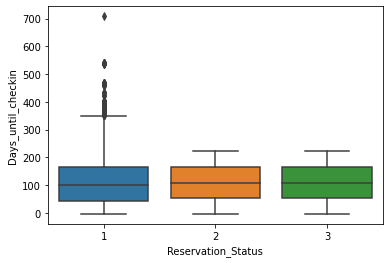

In [14]:
ax = sns.boxplot(x="Reservation_Status", y="Days_until_checkin", data=Encoded_Train_Data)

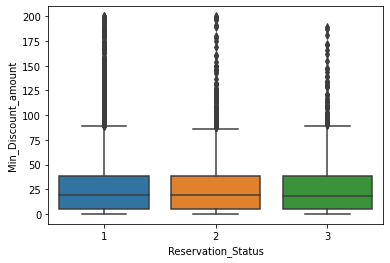

In [15]:
ax = sns.boxplot(x="Reservation_Status", y="Min_Discount_amount", data=Encoded_Train_Data)

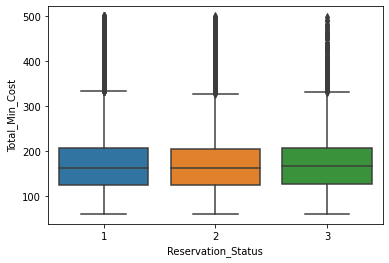

In [16]:
ax = sns.boxplot(x="Reservation_Status", y="Total_Min_Cost", data=Encoded_Train_Data)

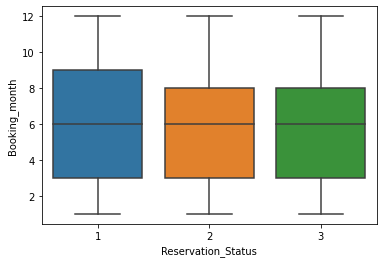

In [17]:
ax = sns.boxplot(x="Reservation_Status", y="Booking_month", data=Encoded_Train_Data)

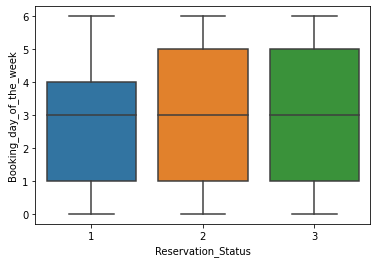

In [18]:
ax = sns.boxplot(x="Reservation_Status", y="Booking_day_of_the_week", data=Encoded_Train_Data)

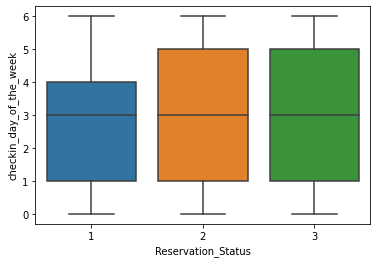

In [19]:

ax = sns.boxplot(x="Reservation_Status", y="checkin_day_of_the_week", data=Encoded_Train_Data)

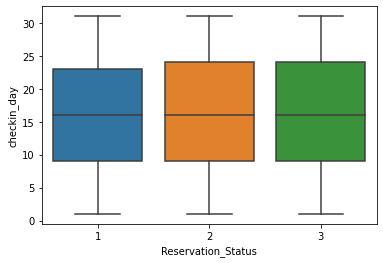

In [20]:
ax = sns.boxplot(x="Reservation_Status", y="checkin_day", data=Encoded_Train_Data)

In [39]:
from sklearn.decomposition import PCA
Continus = ['Age','Discount_Rate','Room_Rate','checkin_month','Adults', 'Children', 'Babies','Income','Meal_Type',
            'Days_until_checkin','Min_num_of_rooms','Total_Min_Cost','Min_Discount_amount','Educational_Level']

Categorical = ['Gender', 'Visted_Previously','Previous_Cancellations', 'Use_Promotion',
              'Ethnicity_African American', 'Ethnicity_Asian American','Ethnicity_Latino', 'Ethnicity_caucasian', 
              'Country_region_East','Country_region_North', 'Country_region_South', 'Country_region_West',
               'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel','Hotel_Type_Resort', 
               'Booking_channel_Agent', 'Booking_channel_Direct','Booking_channel_Online',
               'Booking_month','Booking_day_of_the_week','checkin_day_of_the_week']



pca = PCA(n_components=10)
pca.fit(Encoded_Train_Data.loc[:,Categorical+Continus])

print(pca.singular_values_)

new_PCA_Data=pca.transform(Encoded_Train_Data.loc[:,Categorical+Continus])
PCA_cols = ['PCA'+str(i) for i in range (10)]

PCA_Data=pd.DataFrame(data=new_PCA_Data,index=Encoded_Train_Data.index,columns=PCA_cols)
PCA_Data['Reservation_Status'] = Encoded_Train_Data['Reservation_Status']
PCA_Data

[13599.16395636 12940.31970574  5845.64999277  4368.98889538
  2537.25829317   775.21585736   662.61502592   469.41650549
   170.74511148   168.5543143 ]


,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,Reservation_Status
0,37.474047,-66.576464,27.526159,-18.964757,3.653248,0.868992,0.082421,-1.247806,-0.886289,-1.697185,1
1,185.382667,-63.229884,-70.533590,-0.108413,-4.936601,0.930730,-6.602719,-1.308881,0.291744,1.659975,1
2,40.704729,-105.212307,-79.018030,7.795908,1.914160,0.851958,-0.135304,0.105966,-0.914134,-1.712015,1
3,82.757864,-93.547511,-63.959865,16.134906,19.019336,0.867825,-1.546712,0.094420,1.768199,0.009095,1
4,68.250454,-92.598027,41.016629,-23.640032,-18.444195,0.846847,-0.123149,1.557211,-0.416937,0.491492,1
...,...,...,...,...,...,...,...,...,...,...,...
27494,-105.141197,-79.744778,-37.850238,4.936334,-5.223459,2.292629,1.234661,-1.265432,-1.694862,1.194874,1
27495,-49.509583,14.607661,62.945201,35.166901,-4.862326,2.502165,-4.321767,-1.234336,-0.181720,-0.486701,3
27496,29.197728,-99.260368,10.351753,-24.126560,-5.448414,3.640057,0.843039,0.135192,0.552205,0.748099,1
27497,-54.106328,-15.132046,6.891743,7.404379,-21.066529,2.432133,-2.294688,-1.208330,-0.185029,-0.441922,2


<AxesSubplot:>

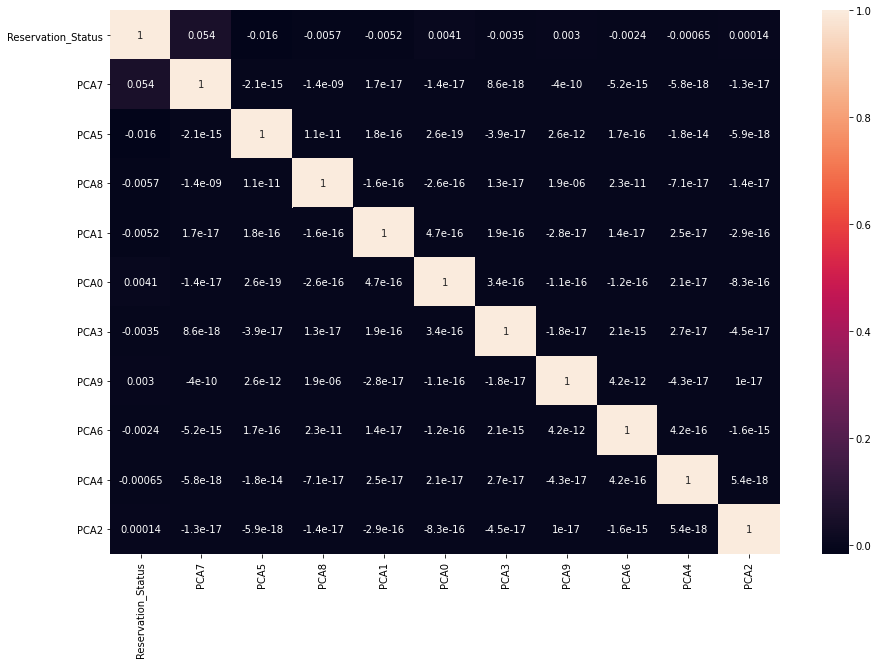

In [40]:
import seaborn as sn
from pandas import DataFrame

t=PCA_Data.columns

s=abs(PCA_Data[t].corr()['Reservation_Status'])
p=s.sort_values(ascending=True)
p.index

t=p.index[::-1]
df = pd.DataFrame(PCA_Data[t],columns=t)
#['age','blood pressure','specific gravity','albumin','sugar','blood glucose random',
#                             'blood urea','serum creatinine','hemoglobin','hypertension','pus cell','class']
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 10},ax=ax)

<AxesSubplot:>

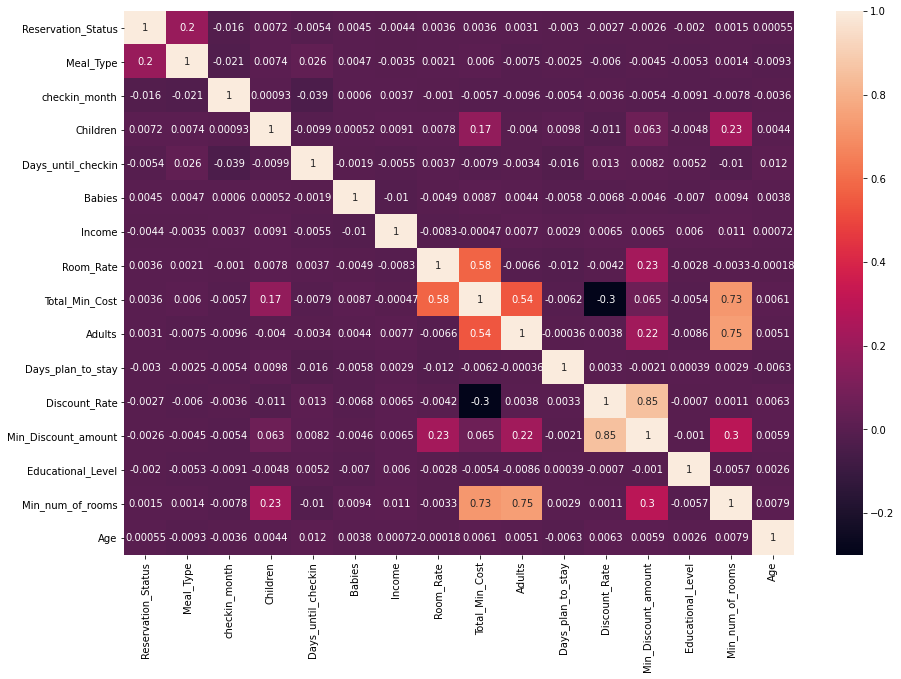

In [34]:
import seaborn as sn
from pandas import DataFrame

t=['Age','Discount_Rate','Room_Rate','checkin_month','Adults', 'Children', 'Babies','Income','Meal_Type',
    'Days_until_checkin','Min_num_of_rooms','Total_Min_Cost','Min_Discount_amount','Educational_Level',
    'Reservation_Status',"Days_plan_to_stay"]

s=abs(Encoded_Train_Data[t].corr()['Reservation_Status'])
p=s.sort_values(ascending=True)
p.index

t=p.index[::-1]
df = pd.DataFrame(Encoded_Train_Data[t],columns=t)
#['age','blood pressure','specific gravity','albumin','sugar','blood glucose random',
#                             'blood urea','serum creatinine','hemoglobin','hypertension','pus cell','class']
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 10},ax=ax)

In [ ]:
from scipy import stats
z_scores = stats.zscore(Encoded_Train_Data[t])


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [ ]:
ax = sns.boxplot(x="Reservation_Status", y="Days_until_checkin", data=new_df)

In [ ]:
new_df